<br/>

$$ \huge{\underline{\textbf{ UCB Bandit }}} $$

<br/>

<center>Implementation of <b>UCB Bandit</b></center>
<center>from Sutton and Barto 2018, <b>chapter 2.7</b>.</center>
<center>Book available for free <a href="http://incompleteideas.net/book/the-book-2nd.html">here</a></center>

<br/>

Upper-Confidence-Bound (UCB) Bandit is the same as [Simple Bandit](0204_Simple_Bandit.html) but with different $A$ selection rule. See book equation (2.10). UCB is used e.g. in AlphaZero algorithm.

$$ A_t \doteq \mathop{\text{argmax}}_a \big[ Q_t(a) + c \sqrt{\frac{\ln{t}}{N_t(a)}} \big] $$

<br/>

In [1]:
def ucb_bandit(env, nb, c):
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    # select each action at lest once
    for A in range(env.size):
        R = env.step(A)
        N[A] += 1
        Q[A] += (1/N[A]) * (R - Q[A])
        
    for t in range(env.size, nb):
        A = argmax_rand( Q + c * np.sqrt( np.log(t) / N ) )
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        
    return Q, np.array(hist_R)

Helper functions:

In [2]:
def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == arr.max()))

---

<table>
    <tr>
        <td style="border-color: white;"><img src="assets/fig_0204.png"/></td>
    </tr>
    <tr>
        <td style="border-color: white;"><center>Figure 2.4<center/></td>
    </tr>
</table>

# Experiment Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Environment

In [4]:
class BanditEnv:
    def __init__(self):
        """10-armed testbed, see chapter 2.3"""
        self.size = 10                                        # 10 arms
        self.means = np.random.normal(loc=0.0, scale=1.0, size=self.size)
    def step(self, action):
        return np.random.normal(loc=self.means[action])

Add history logging

In [5]:
def ucb_bandit(env, nb, c):
    
    hist_R = []
    
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    # select each action at lest once
    for A in range(env.size):
        R = env.step(A)
        N[A] += 1
        Q[A] += (1/N[A]) * (R - Q[A])
        
        hist_R.append(R)
    
    for t in range(env.size, nb):
        A = argmax_rand( Q + c * np.sqrt( np.log(t) / N ) )
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        
        hist_R.append(R)
        
    return Q, np.array(hist_R)

# Recreate Figure 2.4

Simple bandit for comparison

In [6]:
def simple_bandit(env, nb, eps):
    hist_R = []
    
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        
        hist_R.append(R)
        
    return Q, np.array(hist_R)

Generate raw data

In [7]:
runs_ep01_R = []
runs_ucb1_R = []

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    env = BanditEnv()
    
    _, hist_R = simple_bandit(env, nb=1000, eps=0.1)
    runs_ep01_R.append(hist_R)
    
    _, hist_R = ucb_bandit(env, nb=1000, c=2.0)
    runs_ucb1_R.append(hist_R)
    
    if i % 100 == 0: print('.', end='')

runs_ep01_R = np.array(runs_ep01_R)
runs_ucb1_R = np.array(runs_ucb1_R)

v                  v
....................

Calculate average reward

In [8]:
# Calc average reward
avg_ep01_R = np.average(runs_ep01_R, axis=0)
avg_ucb1_R = np.average(runs_ucb1_R, axis=0)

Plot the plots

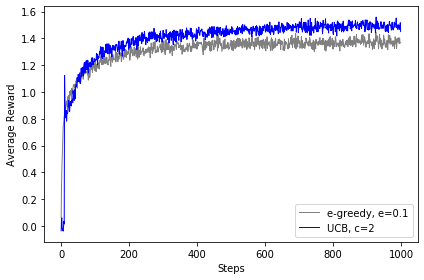

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avg_ep01_R, linewidth=1., color='gray', label='e-greedy, e=0.1')
ax.plot(avg_ucb1_R, linewidth=1., color='blue', label='UCB, c=2')
ax.set_xlabel('Steps'); ax.set_ylabel('Average Reward')
ax.legend()
plt.tight_layout()
plt.savefig('assets/fig_0204.png')
plt.show()